# 阈值分割

In [20]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [21]:
path = 'images/output'

if not os.path.exists(path):
    # 如果路径不存在，则创建它
    os.makedirs(path)
    print(f'路径 {path} 已创建')
else:
    print(f'路径 {path} 已存在')

路径 ../images/output 已存在


灰度图像在图像处理和计算机视觉任务中非常常用，因为它们简化了计算。灰度图像去除了颜色信息，只保留亮度信息，使得某些图像处理任务（如边缘检测、阈值分割等）变得更简单。

(<Axes: >, <matplotlib.image.AxesImage at 0x1f79b2fcdd0>)

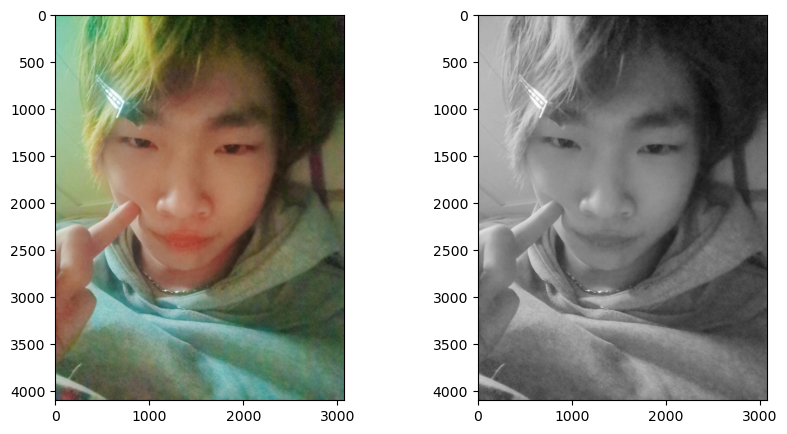

In [22]:
# 读取图像
# R:0.299、G:0.587 B:0.114
image_rgb = cv.imread("images/cutebuzhen.jpg", cv.IMREAD_COLOR)  
image = cv.imread("images/cutebuzhen.jpg", cv.IMREAD_GRAYSCALE)  

# 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(image_rgb, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap='gray')


## 单阈值分割

### 设置阈值
选择一个合适的阈值。这个值可以通过实验确定，或者使用一些方法（例如 Otsu’s 方法）自动确定。

In [23]:
# 选择阈值
threshold_value = 80


### 应用阈值

In [24]:
# 应用阈值
# _, binary_image = cv.threshold(
#     src=image, thresh=threshold_value, maxval=255, type=cv.THRESH_BINARY_INV
# )
_, binary_image = cv.threshold(
    src=image, thresh=threshold_value, maxval=255, type=cv.THRESH_BINARY
)

除了基本的二值阈值分割，OpenCV 还提供了其他类型的阈值分割方法，例如：

cv2.THRESH_BINARY_INV：阈值反转，将像素值大于阈值的部分设置为0，小于阈值的部分设置为最大值（255）。
cv2.THRESH_TRUNC：将像素值大于阈值的部分设置为阈值，其他部分保持不变。
cv2.THRESH_TOZERO：像素值小于阈值的部分设置为0，大于阈值的部分保持不变。
cv2.THRESH_TOZERO_INV：像素值大于阈值的部分设置为0，小于阈值的部分保持不变。

In [25]:
# # 显示原图和阈值分割图像
# cv.imshow('Original Image', image)
# cv.imshow('Binary Image', binary_image)

# # 保存处理后的图像
# # cv.imwrite('binary_image.jpg', binary_image)

# # 等待用户按键，然后关闭所有窗口
# cv.waitKey(0)   
# cv.destroyAllWindows()

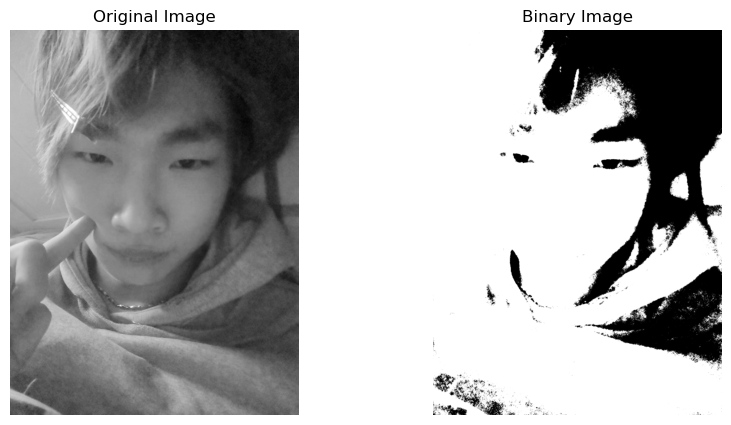

In [26]:
# 显示原图和阈值分割图像
plt.figure(figsize=(10, 5))

# 显示原图
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 显示阈值分割图像
plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# 显示图像
plt.show()

# 保存处理后的图像
plt.imsave('images/output/binary_image.png', binary_image, cmap='gray')

### 应用掩码


In [27]:
# 将二值图像转换为布尔掩码
mask = binary_image.astype(bool)

# 确保掩码的形状与原始图像一致
mask = np.stack([mask] * 3, axis=-1)

# 使用掩码提取前景
foreground = np.where(mask, image_rgb, 0)

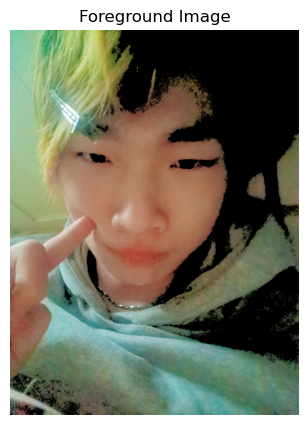

True

In [28]:
# 显示前景图像
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))  # 转换为 RGB 以便在 matplotlib 中显示
plt.title('Foreground Image')
plt.axis('off')
plt.show()
# 保存前景图像
cv.imwrite('images/output/foreground_image.png', foreground)

### Alpha通道

In [29]:
# 创建一个与原图像大小相同的 alpha 通道，初始值为 255（完全不透明）
alpha_channel = np.ones((image.shape[0], image.shape[1]), dtype=np.uint8) * 255

# 将 alpha 通道添加到原图像中
image_with_alpha = np.dstack([cv.cvtColor(image ,cv.COLOR_BGR2RGB), alpha_channel])


# 检查图像是否包含 alpha 通道
if image_with_alpha.shape[2] == 4:
    rgb_image = image_with_alpha[:, :, :3]
    alpha_channel = image_with_alpha[:, :, 3]
else:
    raise ValueError("图像没有 alpha 通道")

print(image_with_alpha.shape)  # 4

(4096, 3072, 4)


In [30]:
# 将二值图像转换为布尔掩码
mask2 = binary_image.astype(bool)

# 归一化掩膜（如果掩膜的值在 0 到 255 之间）
# mask2 = mask2.astype(float) / 255.0

# 根据掩膜调整 alpha 通道
alpha_channel = (alpha_channel * mask2).astype(np.uint8)

image_with_alpha = np.dstack([rgb_image, alpha_channel])

# 保存结果
cv.imwrite('images/output/adjusted_image_with_alpha.png', image_with_alpha)

True

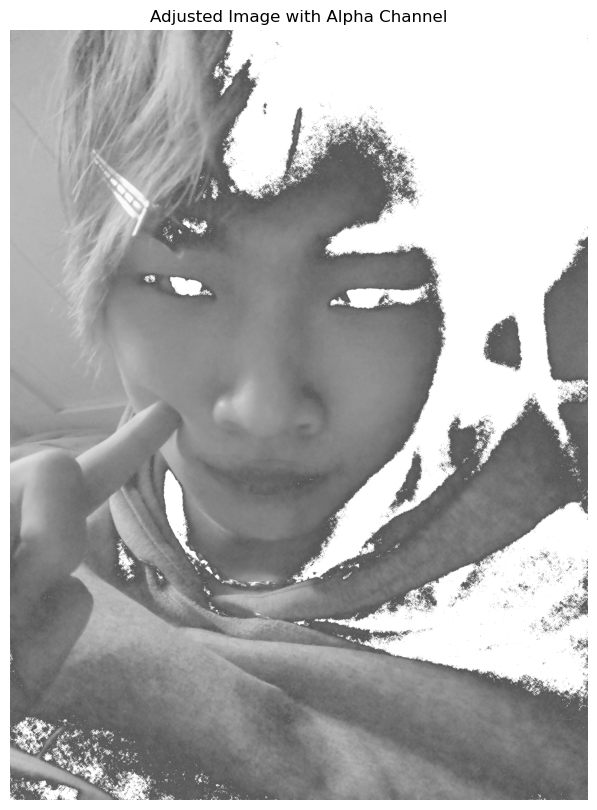

In [31]:
# 读取调整后的图像
image_with_alpha = cv.imread('images/output/adjusted_image_with_alpha.png', cv.IMREAD_UNCHANGED)

# 分离 RGB 和 alpha 通道
rgb_image = image_with_alpha[:, :, :3]
alpha_channel = image_with_alpha[:, :, 3]

# 显示图像
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image_with_alpha, cv.COLOR_BGRA2RGBA))
# plt.imshow(alpha_channel, cmap='gray', alpha=0)  # 使用 alpha 频道来设置透明度
plt.title('Adjusted Image with Alpha Channel')
plt.axis('off')
plt.show()